In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [16]:
campuscime22_path = r"C:\Users\travi\OneDrive - North Dakota University System\Documents\Academic\Research\Campus Violence Prediction\Campus Safety Crime Statistics\Crime2022EXCEL\FORAI.xlsx"
campuscime20_path = r"C:\Users\travi\OneDrive - North Dakota University System\Documents\Academic\Research\Campus Violence Prediction\Campus Safety Crime Statistics\Crime2020EXCEL\FORAI.xlsx"
campuscime17_path = r"C:\Users\travi\OneDrive - North Dakota University System\Documents\Academic\Research\Campus Violence Prediction\Campus Safety Crime Statistics\Crime2017EXCEL\FORAI.xlsx"

campus_crime22 = pd.read_excel(campuscime22_path, sheet_name='oncampuscrime192021', engine='openpyxl')
campus_crime20 = pd.read_excel(campuscime20_path, sheet_name='Oncampuscrime171819', engine='openpyxl')
campus_crime17 = pd.read_excel(campuscime17_path, sheet_name='Query', engine='openpyxl')

C:\Users\travi\OneDrive - North Dakota University System\Desktop\AI_Model_Code\AI Regression Model\.venv\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\travi\OneDrive - North Dakota University System\Desktop\AI_Model_Code\AI Regression Model\.venv\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [17]:
# Path to the Excel file
firearm_path = r"C:\Users\travi\OneDrive - North Dakota University System\Documents\Academic\Research\Campus Violence Prediction\FirearmPolicyData.xlsx"

campuscrime_path = r"C:\Users\travi\OneDrive - North Dakota University System\Documents\Academic\Research\Campus Violence Prediction\UniversityCrimeData.xlsx"

# Read data from the 'Firearm Policy Database' sheet
firearm_policy = pd.read_excel(firearm_path, sheet_name='Sheet1', engine='openpyxl')
campus_crime = pd.read_excel(campuscrime_path, sheet_name='UniversityCrimeData', engine='openpyxl')

# Display the first few rows from each sheet to verify they've loaded correctly
print("Firearm Policy Database:")
#print(firearm_policy)

#print("\nInstitutional Characteristics 2022:")
#print(institutional_chars)

campus_crime = campus_crime.drop(['Sector_desc', 'sector_cd', 'Address', 'UNITID_P', 'NEG_M19', 'RAPE19', 'FONDL19', 'INCES19', 'STATR19', 'ROBBE19', 'AGG_A19', 'BURGLA19', 'VEHIC19', 'ARSON19', 'NEG_M20', 'RAPE20', 'FONDL20', 'INCES20', 'STATR20', 'ROBBE20', 'AGG_A20', 'BURGLA20', 'VEHIC20', 'ARSON20',  'NEG_M21', 'RAPE21', 'FONDL21', 'INCES21', 'STATR21', 'ROBBE21', 'AGG_A21', 'BURGLA21', 'VEHIC21', 'ARSON21'], axis=1)

print("\nOn Campus Crime 2019 - 2021:")
print(campus_crime)

Firearm Policy Database:

On Campus Crime 2019 - 2021:
                                                  INSTNM  \
0                               Alabama A & M University   
1                    University of Alabama at Birmingham   
2                    University of Alabama at Birmingham   
3                    University of Alabama in Huntsville   
4                               Alabama State University   
...                                                  ...   
10662                           Madera Community College   
10663                           Madera Community College   
10664          Arizona College of Nursing-Salt Lake City   
10665                           Arizona College-Glendale   
10666  Medspa Academies-National Institute of Modern ...   

                                   BRANCH        City State        ZIP  \
0                             Main Campus      NORMAL    AL      35762   
1                             Main Campus  BIRMINGHAM    AL  352940110   
2 

In [18]:
# Initialize the dictionary for state enabled values
statesEffectValue = {'AK': 0, 'AL': 0, 'AR': 0, 'AZ': 0, 'CA': 0, 'CO': 0, 'CT': 0, 'DC': 0, 'DE': 0, 'FL': 0, 'GA': 0, 'HI': 0, 'ID': 0, 'IL': 0, 'IN': 0, 'KS': 0, 'KY': 0, 'LA': 0, 'MA': 0, 'MD': 0, 'ME': 0, 'MI': 0, 'MO': 0, 'MS': 0, 'MT': 0, 'NC': 0, 'NE': 0, 'NH': 0, 'NJ': 0, 'NM': 0, 'NV': 0, 'NY': 0, 'OH': 0, 'OK': 0, 'OR': 0, 'PA': 0, 'RI': 0, 'SC': 0, 'TN': 0, 'TX': 0, 'UT': 0, 'VA': 0, 'VT': 0, 'WA': 0, 'WV': 0, 'WY': 0, 'WI': 0, 'IA': 0, 'MN': 0, 'ND': 0, 'SD': 0}

for index, policy in firearm_policy.iterrows():
    if policy['Effect'] == "Permissive":
        statesEffectValue[policy['State']] -= 1
    elif policy['Effect'] == "Restrictive":
        statesEffectValue[policy['State']] += 1

# Assuming statesEffectValue is already defined as shown in your snippet

# Convert the dictionary into a DataFrame for better table formatting
states_effect_df = pd.DataFrame(list(statesEffectValue.items()), columns=['State', 'EffectValue'])
# Sort the DataFrame by 'EffectValue'
states_effect_df = states_effect_df.sort_values(by='EffectValue', ascending=False)

# Sort the DataFrame for better readability
#states_effect_df = states_effect_df.sort_values('State')

# Use the .style property to add some styling
styled_df = states_effect_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt')]}]
).set_properties(**{
    'text-align': 'center',
    'font-size': '11pt'
})

# Display the styled DataFrame
styled_df

#print(statesEffectValue)
#print(campus_crime)

,State,EffectValue
4,CA,63
18,MA,42
11,HI,41
13,IL,41
28,NJ,40
31,NY,34
6,CT,34
7,DC,32
19,MD,27
36,RI,25


In [19]:
Years = 3

# Adding a new column for the average murders
campus_crime['schoolMurderYearAverage'] = (campus_crime["MURD19"] + campus_crime["MURD20"] + campus_crime["MURD21"]) / Years

# Drop rows where 'schoolMurderYearAverage' is NaN
campus_crime = campus_crime.dropna(subset=['schoolMurderYearAverage'])
#campus_crime = campus_crime.dropna(subset=['men_total'])
#campus_crime = campus_crime.dropna(subset=['women_total'])
#campus_crime = campus_crime.dropna(subset=['Total'])

ascending_campus_crime = campus_crime.sort_values(by='schoolMurderYearAverage', ascending=True)
print(ascending_campus_crime)
# Displaying statistical summary and the first few rows of the DataFrame
#print(campus_crime)

                                         INSTNM  \
0                      Alabama A & M University   
7031       Southside Virginia Community College   
7032       Southside Virginia Community College   
7033       Southside Virginia Community College   
7034       Southside Virginia Community College   
...                                         ...   
4975          North Carolina Central University   
1301                Florida Memorial University   
6395            Texas A & M University-Commerce   
4971  University of North Carolina at Charlotte   
2749                 Grambling State University   

                                             BRANCH           City State  \
0                                       Main Campus         NORMAL    AL   
7031                          John H. Daniel Campus      Keysville    VA   
7032                         Estes Community Center     Chase City    VA   
7033     The Lake Country Advanced Knowledge Center     South Hill    VA   
7034  T

In [20]:
MurderYearAverage = pd.DataFrame(list(campus_crime.items()), columns=['State', 'schoolMurderYearAverage'])

# Merge the campus crime dataset with the states effect values
merged_data = pd.merge(campus_crime, states_effect_df, on='State')

# Drop duplicate rows based on the "INSTNM" column
#merged_data = merged_data.drop_duplicates(subset='INSTNM', keep='first')

In [21]:
# Saving the new dataset to the hard drive
merged_data.to_excel("Merged_Dataset.xlsx", index=False, engine='openpyxl')

In [32]:
# Find rows with NaN in any column
rows_with_nan = merged_data[merged_data.isnull().any(axis=1)]
# Print the rows with NaN values
print(rows_with_nan)
# Ensure that your data does not contain NaN values in the columns used for prediction
merged_data.dropna(subset=['men_total', 'women_total', 'Total'], inplace=True)

# Find rows with NaN in any column
rows_with_nan = merged_data[merged_data.isnull().any(axis=1)]
# Print the rows with NaN values
print(rows_with_nan)

                                   INSTNM                   BRANCH  \
1965  National Latino Education Institute              Main Campus   
8056       Southern University Law Center  Main Campus(Law Center)   

             City State        ZIP  men_total  women_total  Total  MURD19  \
1965      CHICAGO    IL  606092205        NaN          NaN    NaN     0.0   
8056  BATON ROUGE    LA  708139294        NaN          NaN    NaN     0.0   

      MURD20  MURD21  schoolMurderYearAverage  EffectValue  
1965     0.0       0                      0.0           41  
8056     0.0       0                      0.0            2  
Empty DataFrame
Columns: [INSTNM, BRANCH, City, State, ZIP, men_total, women_total, Total, MURD19, MURD20, MURD21, schoolMurderYearAverage, EffectValue]
Index: []


In [30]:
# Define the feature and the target variable
X = merged_data[['EffectValue']]  # Feature
y = merged_data['schoolMurderYearAverage']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0007340938371030563


In [33]:
# Define the feature and the target variable
X = merged_data[['EffectValue', 'men_total', 'women_total', 'Total']]  # Feature
y = merged_data['schoolMurderYearAverage']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
NewModel = LinearRegression()
NewModel.fit(X_train, y_train)

# Predict on the test data and evaluate
y_pred = NewModel.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0006776753425584198


In [28]:
# Function to get the effect value for a given state
def get_effect_value(state):
    return statesEffectValue.get(state, None)  # returns None if state not found

# Function to predict the murder rate for a given state
def predict_murder_rate(state):
    effect_value = get_effect_value(state)
    if effect_value is None:
        print("State not found in the mapping.")
        return None
    
    input_data = pd.DataFrame({'EffectValue': [effect_value]})
    print(input_data)
    predicted_murder_rate = model.predict(input_data)
    return predicted_murder_rate

def predict_school_murder_rate(SchoolName):
    schoolState = campus_crime[campus_crime['INSTNM'] == SchoolName]['State'].iloc[0]
    schoolMen = campus_crime[campus_crime['INSTNM'] == SchoolName]['men_total'].iloc[0]
    schoolWomen = campus_crime[campus_crime['INSTNM'] == SchoolName]['women_total'].iloc[0]
    schoolTotal = campus_crime[campus_crime['INSTNM'] == SchoolName]['Total'].iloc[0]
    effectValue = get_effect_value(schoolState)
    
    effect_value = get_effect_value(state)
    if effect_value is None:
        print('STATE VAL: ' + 'State not found in the mapping.')
        return None
    
    # Ensure that you have the same features as when you trained the model
    input_data = pd.DataFrame({'EffectValue': [effectValue], 'men_total':[schoolMen], 'women_total':[schoolWomen], 'Total': [schoolTotal]})
    
    predicted_murder_rate2 = NewModel.predict(input_data)
    return predicted_murder_rate2

In [24]:
statePredictedMurders = {'AK': 0, 'AL': 0, 'AR': 0, 'AZ': 0, 'CA': 0, 'CO': 0, 'CT': 0, 'DC': 0, 'DE': 0, 'FL': 0, 'GA': 0, 'HI': 0, 'ID': 0, 'IL': 0, 'IN': 0, 'KS': 0, 'KY': 0, 'LA': 0, 'MA': 0, 'MD': 0, 'ME': 0, 'MI': 0, 'MO': 0, 'MS': 0, 'MT': 0, 'NC': 0, 'NE': 0, 'NH': 0, 'NJ': 0, 'NM': 0, 'NV': 0, 'NY': 0, 'OH': 0, 'OK': 0, 'OR': 0, 'PA': 0, 'RI': 0, 'SC': 0, 'TN': 0, 'TX': 0, 'UT': 0, 'VA': 0, 'VT': 0, 'WA': 0, 'WV': 0, 'WY': 0, 'WI': 0, 'IA': 0, 'MN': 0, 'ND': 0, 'SD': 0}

for state in statePredictedMurders:
    statePredictedMurders[state] = predict_murder_rate(state)

# Sort the dictionary by its values and create a sorted list of tuples
sorted_statePredictedMurders = sorted(statePredictedMurders.items(), key=lambda item: item[1], reverse=True)

# If you want to maintain a dictionary format and preserve the order
from collections import OrderedDict
sorted_statePredictedMurders_dict = OrderedDict(sorted_statePredictedMurders)

print(statePredictedMurders)
# If you need it back as a dictionary

   EffectValue
0            2
   EffectValue
0            3
   EffectValue
0            4
   EffectValue
0           11
   EffectValue
0           63
   EffectValue
0            9
   EffectValue
0           34
   EffectValue
0           32
   EffectValue
0           22
   EffectValue
0           22
   EffectValue
0            2
   EffectValue
0           41
   EffectValue
0            1
   EffectValue
0           41
   EffectValue
0            6
   EffectValue
0            0
   EffectValue
0            0
   EffectValue
0            2
   EffectValue
0           42
   EffectValue
0           27
   EffectValue
0            3
   EffectValue
0           12
   EffectValue
0            3
   EffectValue
0            1
   EffectValue
0            0
   EffectValue
0           15
   EffectValue
0           13
   EffectValue
0            4
   EffectValue
0           40
   EffectValue
0            9
   EffectValue
0           18
   EffectValue
0           34
   EffectValue
0           11
   EffectV

In [181]:
# Example usage
state_to_predict = 'MT'

predicted_rate = predict_murder_rate(state_to_predict)
print(f"Raw predicted rate for {state_to_predict}:", predicted_rate)

   EffectValue
0            0
Raw predicted rate for MT: [0.00193231]


In [182]:
state_to_predict = 'CA'
predicted_rate = predict_murder_rate(state_to_predict)
print(f"Raw predicted rate for {state_to_predict}:", predicted_rate)

   EffectValue
0           63
Raw predicted rate for CA: [0.00103425]


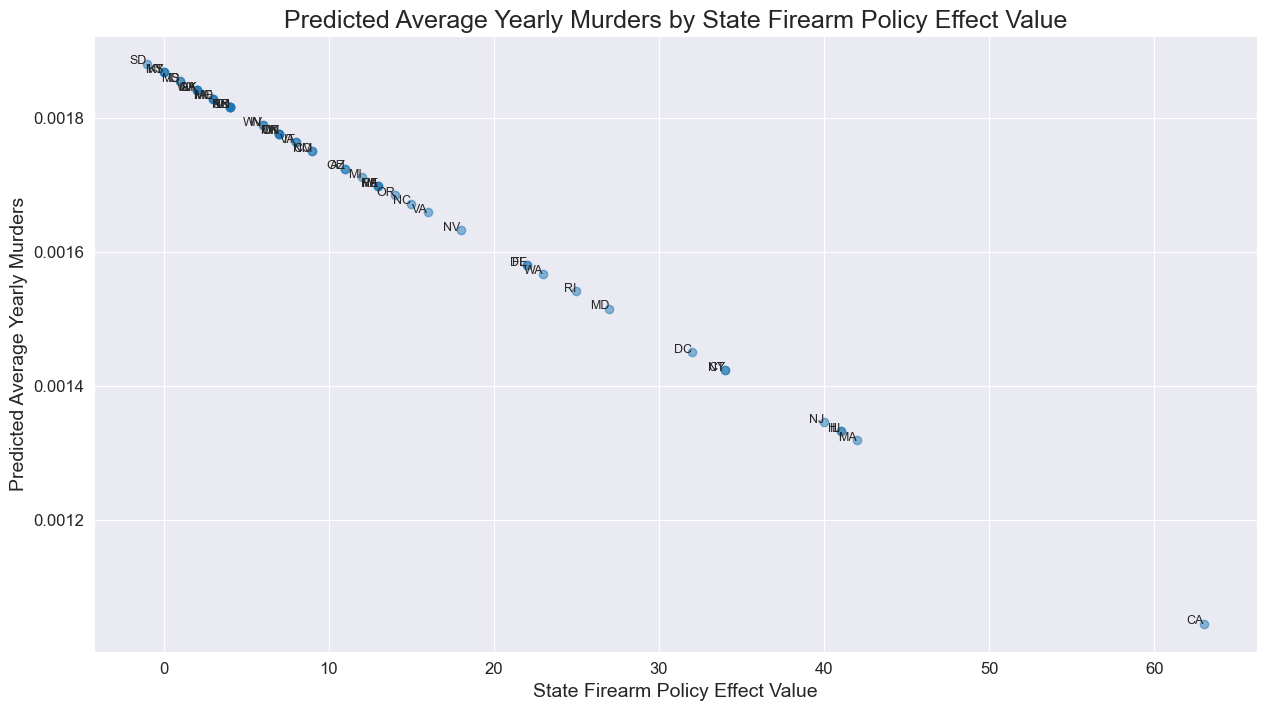

In [43]:
# Combine the dictionaries into a DataFrame
data = pd.DataFrame({
    'State': list(statesEffectValue.keys()),
    'EffectValue': list(statesEffectValue.values()),
    'PredictedMurders': list(statePredictedMurders.values())
})

# Plotting
plt.figure(figsize=(15, 8))  # Set the size of the figure
plt.scatter(data['EffectValue'], data['PredictedMurders'], alpha=0.5)  # alpha sets the transparency

# Label the axes with increased font size
plt.title('Predicted Average Yearly Murders by State Firearm Policy Effect Value', fontsize=18)
plt.xlabel('State Firearm Policy Effect Value', fontsize=14)
plt.ylabel('Predicted Average Yearly Murders', fontsize=14)

# Increase the font size for the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Optionally, increase the font size of the annotations and adjust their positions
for i, txt in enumerate(data['State']):
    plt.annotate(txt, (data['EffectValue'].iat[i], data['PredictedMurders'].iat[i]), fontsize=9, ha='right')

plt.show()

In [37]:
schoolPredictionData = {}

for index, school in merged_data.iterrows():
    # Check if any of the columns used for prediction contains NaN.
    if pd.isnull(school['EffectValue']) or pd.isnull(school['schoolMurderYearAverage']):
        print(f"NaN found in row: {index}, school: {school['INSTNM']}")
        continue  # Skip this iteration and therefore not predict or add to schoolPredictionData

    # If no NaN values are found, proceed to predict the murder rate.
    try:
        murder_rate = predict_school_murder_rate(school['INSTNM'])
        schoolPredictionData[index] = {
            'INSTNM': school['INSTNM'], 
            'EffectValue': school['EffectValue'], 
            'Average Murder': school['schoolMurderYearAverage'], 
            'Total' : school['Total'],
            'Predicted Yearly Murder': murder_rate
        }
    except Exception as e:
        print(f"An error occurred with school {school['INSTNM']}: {e}")

print(schoolPredictionData)

An error occurred with school Universidad Ana G. Mendez-Cupey Campus: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
An error occurred with school Universidad Ana G. Mendez-Cupey Campus: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept

                                      INSTNM  EffectValue  Average Murder  \
0                   Alabama A & M University            3        0.000000   
1        University of Alabama at Birmingham            3        0.333333   
2        University of Alabama at Birmingham            3        0.000000   
3        University of Alabama in Huntsville            3        0.000000   
4                   Alabama State University            3        0.000000   
...                                      ...          ...             ...   
9797       The Pennsylvania State University           13        0.000000   
9798       San Joaquin Valley College-Madera           63        0.000000   
9799       San Joaquin Valley College-Delano           63        0.000000   
9800   San Joaquin Valley College-Atascadero           63        0.000000   
9801  San Joaquin Valley College-Porterville           63        0.000000   

        Total   Predicted Yearly Murder  
0      5969.0   [0.00172944563981

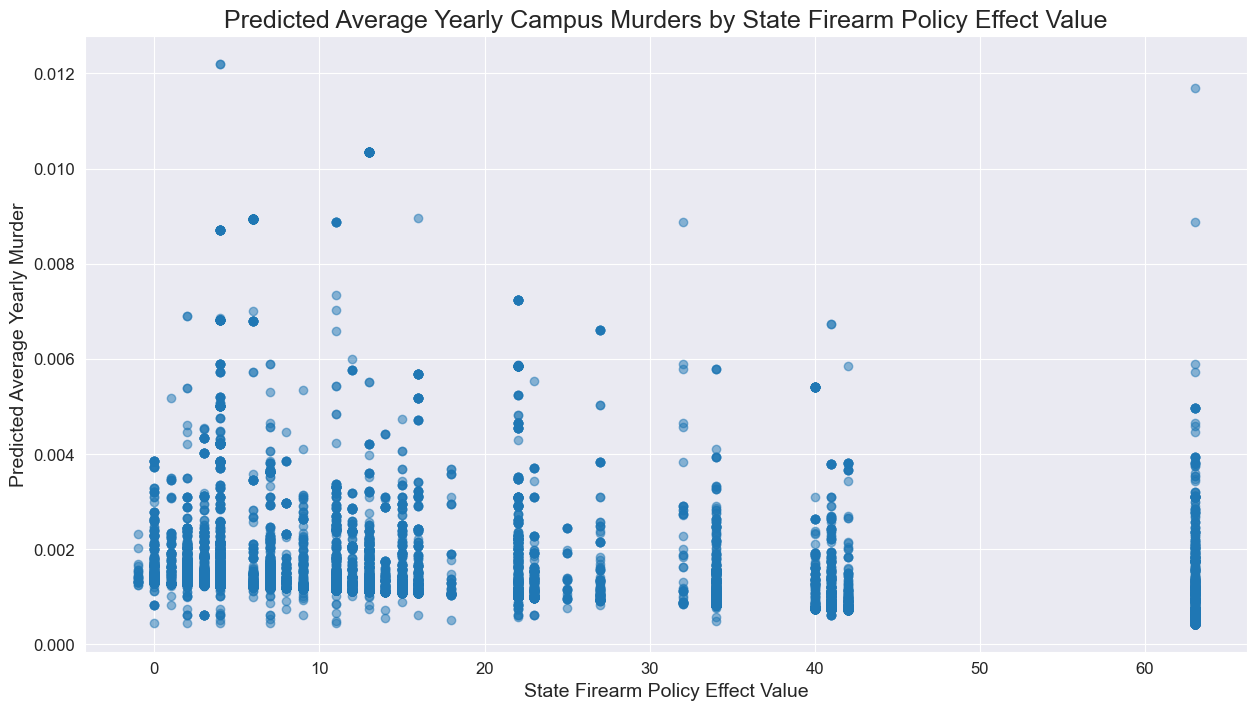

In [38]:
# Convert the schoolPredictionData dictionary into a DataFrame
school_data = pd.DataFrame.from_dict(schoolPredictionData, orient='index')

# Verify the structure of the DataFrame
print(school_data)

# Plotting
plt.figure(figsize=(15, 8))
plt.scatter(school_data['EffectValue'], school_data['Predicted Yearly Murder'], alpha=0.5)

# Label the axes
plt.title('Predicted Average Yearly Campus Murders by State Firearm Policy Effect Value', fontsize=18)
plt.xlabel('State Firearm Policy Effect Value', fontsize=14)
plt.ylabel('Predicted Average Yearly Murder', fontsize=14)

# Tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotations with the institution names
#for i, row in school_data.iterrows():
#    plt.annotate(row['INSTNM'], (row['EffectValue'], row['Predicted Yearly Murder']), fontsize=9, ha='right')

plt.show()


In [39]:
def predict_arbitrary_university(effect_value, men_total, women_total, total):
    # Ensure that you have the same features as when you trained the model
    input_data = pd.DataFrame({
        'EffectValue': [effect_value], 
        'men_total': [men_total], 
        'women_total': [women_total], 
        'Total': [total]
    })
    
    # Use the trained model to make a prediction
    predicted_murder_rate = NewModel.predict(input_data)
    return predicted_murder_rate[0]

Predicted average yearly murders for arbitrary university: 0.0014438018142646338


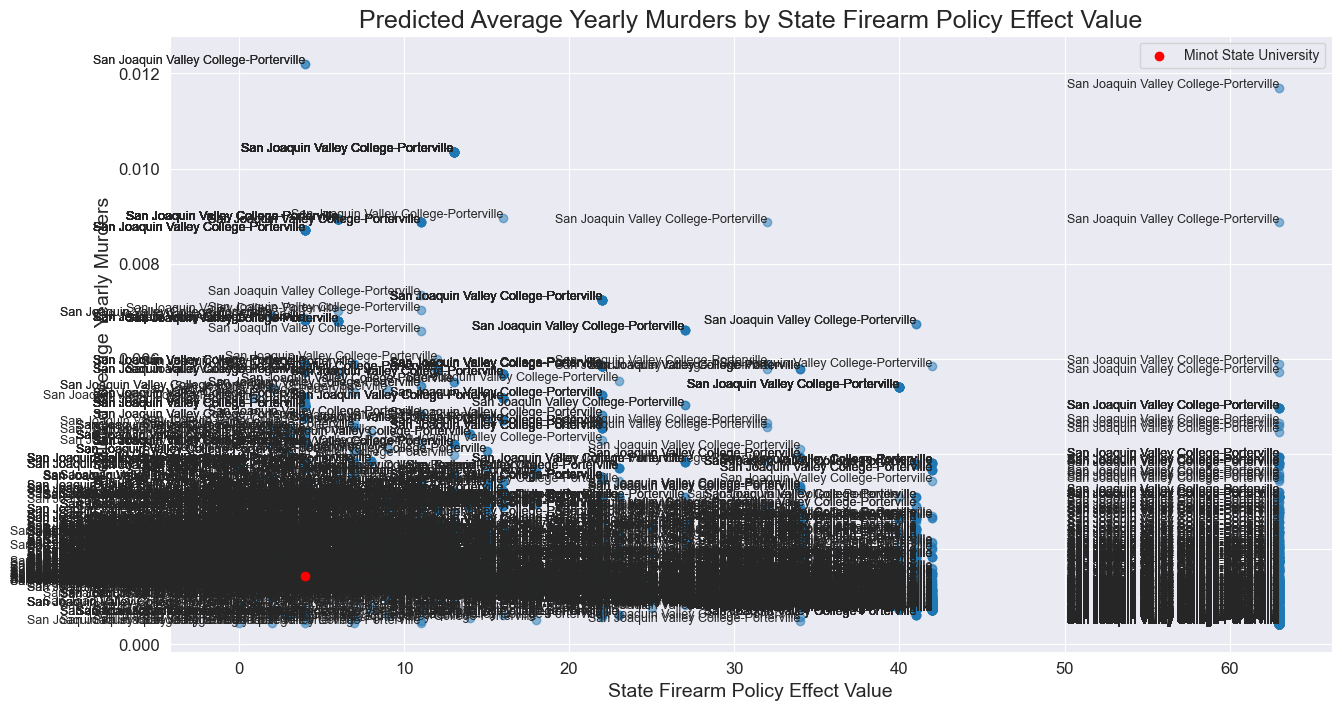

In [41]:
# Example usage with arbitrary values
arbitrary_effect_value = get_effect_value('ND')  # Some arbitrary effect value
arbitrary_men_total = 1006  # Some arbitrary men_total
arbitrary_women_total = 1830  # Some arbitrary women_total
arbitrary_total = 2836  # Some arbitrary total

# Call the function with the arbitrary values to get a prediction
arbitrary_university_murder_rate = predict_arbitrary_university(
    arbitrary_effect_value,
    arbitrary_men_total,
    arbitrary_women_total,
    arbitrary_total
)
print(f"Predicted average yearly murders for arbitrary university: {arbitrary_university_murder_rate}")

# Now let's plot this fake university on the existing graph
# First, let's recreate the previous scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(school_data['EffectValue'], school_data['Predicted Yearly Murder'], alpha=0.5)

# Label the axes
plt.title('Predicted Average Yearly Murders by State Firearm Policy Effect Value', fontsize=18)
plt.xlabel('State Firearm Policy Effect Value', fontsize=14)
plt.ylabel('Predicted Average Yearly Murders', fontsize=14)

# Tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Optionally, increase the font size of the annotations and adjust their positions
for i, txt in enumerate(school_data['INSTNM']):
    if txt == 'Minot State University':
        plt.annotate(txt, (school_data['EffectValue'].iat[i], school_data['Predicted Yearly Murder'].iat[i]), fontsize=9, ha='right')
        
for i, Pop in enumerate(school_data['Total']):
    if Pop > 50000:
        plt.annotate(txt, (school_data['EffectValue'].iat[i], school_data['Predicted Yearly Murder'].iat[i]), 
fontsize=9, ha='right')
    elif Pop > 25000:
        plt.annotate(txt, (school_data['EffectValue'].iat[i], school_data['Predicted Yearly Murder'].iat[i]), 
fontsize=9, ha='right')
    elif Pop > 10000:
        plt.annotate(txt, (school_data['EffectValue'].iat[i], school_data['Predicted Yearly Murder'].iat[i]), 
fontsize=9, ha='right')
    else:
        plt.annotate(txt, (school_data['EffectValue'].iat[i], school_data['Predicted Yearly Murder'].iat[i]), 
fontsize=9, ha='right')

# Plot the fake university with a different color and label
plt.scatter(
    arbitrary_effect_value, 
    arbitrary_university_murder_rate, 
    color='red', 
    label='Minot State University', 
    zorder=5  # Put the point on top of the others
)

# Add a legend to the plot
plt.legend()

# Show the plot with the newly added point
plt.show()

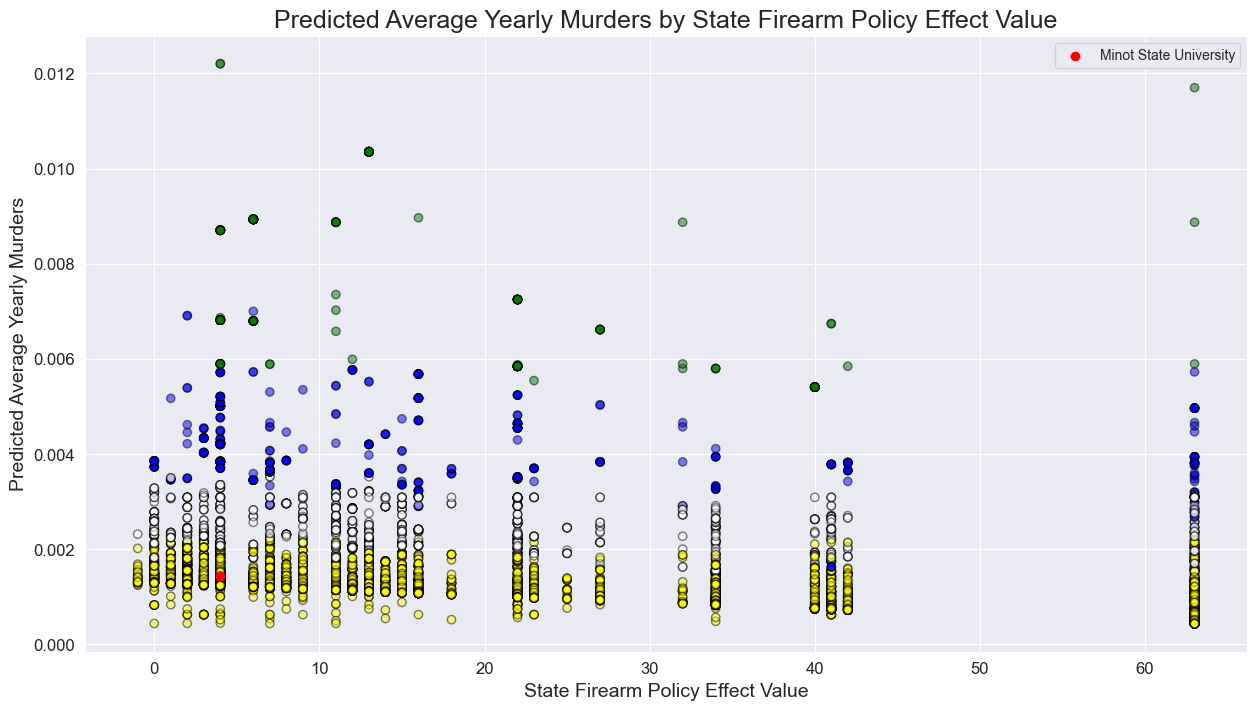

In [42]:
# Create a color list based on school sizes
colors = school_data['Total'].apply(lambda x: 'green' if x > 50000 else
                                              'blue' if x > 25000 else
                                              'white' if x > 10000 else
                                              'yellow')

# Plot the universities with colors based on their size
plt.figure(figsize=(15, 8))
plt.scatter(school_data['EffectValue'], school_data['Predicted Yearly Murder'], alpha=0.5, c=colors, edgecolors='black')

# Label the axes
plt.title('Predicted Average Yearly Murders by State Firearm Policy Effect Value', fontsize=18)
plt.xlabel('State Firearm Policy Effect Value', fontsize=14)
plt.ylabel('Predicted Average Yearly Murders', fontsize=14)

# Tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotations
#for i, txt in enumerate(school_data['INSTNM']):
    #plt.annotate(txt, (school_data['EffectValue'].iat[i], school_data['Predicted Yearly Murder'].iat[i]), fontsize=9, ha='right')

# Plot the arbitrary university with a red color and label
plt.scatter(
    arbitrary_effect_value, 
    arbitrary_university_murder_rate, 
    color='red', 
    label='Minot State University', 
    zorder=5  # Put the point on top of the others
)

# Add a legend for the arbitrary university
plt.legend()

# Show the plot with the newly added points
plt.show()